## Import Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

## Looking at the Dataset
#### Load Dataset and Get a feel of it 

In [7]:
# Load dataset
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [8]:
# Get Keys
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
# Get feature names (variable names)
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Plot Two Features  

(150, 4)


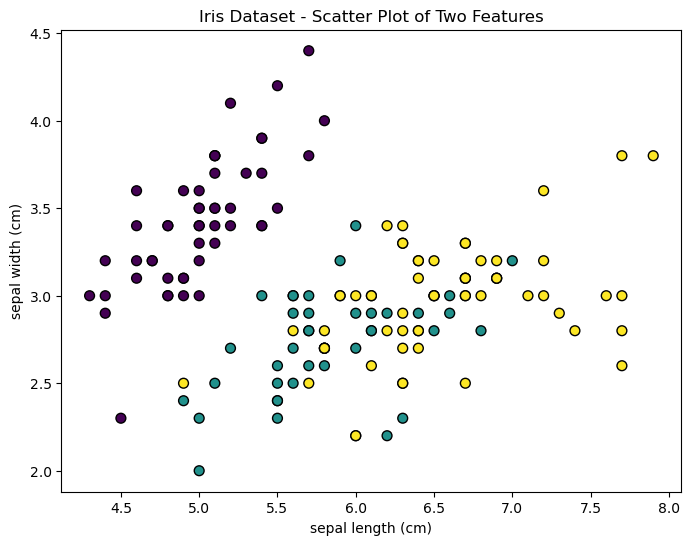

In [18]:
# Get Data
X = iris.data  #data points
y = iris.target #labels
print (data.shape)
# Select two features (e.g., sepal length and sepal width)
feature1_index = 0  # Sepal length
feature2_index = 1  # Sepal width

# Extract the selected features
feature1 = X[:, feature1_index]
feature2 = X[:, feature2_index]

# print(data)
# print(data.shape)
# print(type(data))

# print(target)
# print(target.shape)
# print(type(target))

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(feature1, feature2, c=y, cmap='viridis', edgecolors='k', s=50)
plt.xlabel(iris.feature_names[feature1_index])
plt.ylabel(iris.feature_names[feature2_index])
plt.title('Iris Dataset - Scatter Plot of Two Features')
plt.show()

## K-Nearest Neighbor (KNN)

### What is KNN (K-Nearest Neighbor) Algorithm?
The K-Nearest Neighbor (KNN) algorithm is a popular machine learning technique used for classification and regression tasks. It relies on the idea that similar data points tend to have similar labels or values.

During the training phase, the KNN algorithm stores the entire training dataset as a reference. When making predictions, it calculates the distance between the input data point and all the training examples, using a chosen distance metric such as Euclidean distance.

Next, the algorithm identifies the K nearest neighbors to the input data point based on their distances. In the case of `classification`, the algorithm assigns the most common class label among the K neighbors as the predicted label for the input data point <u>(Get the label with majority vote)</u>. For `regression`, it calculates the average or weighted average of the target values of the K neighbors to predict the value for the input data point <u>(get the average of input values)</u>.

### When Do We Use the KNN Algorithm?
KNN can be used for <u> both classification and regression</u> predictive problems. However, it is more widely used in classification problems in the industry. KNN is commonly used for its ease of interpretation and low calculation time.

### How Does the KNN Algorithm Work?
Let’s take a simple case to understand this algorithm.  Take the above plot of `Iris Dataset - Scatter Plot of Two Features`. You intend to find out the class of a random point(RP). RP can either be purple or green or yellow and nothing else. The “K” in KNN algorithm is the nearest neighbor we wish to take the vote from. Let’s say K = 3. Hence, we will now make a circle with RP as the center just as big as to enclose only three data points on the plane. 
Imagine the three closest points to RP are all yellow. Hence, with a good confidence level, we can say that the RP should belong to the class yellow. Here, the choice became obvious as all three votes from the closest neighbor went to yellow. The choice of the parameter K is very crucial in this algorithm. <u>(K is a hyperparameter, meaning that it is a configuration setting external to the model that can't be learned from the data.)</u> Next, we will understand the factors to be considered to conclude the best K.

## How does the K influence in the algorithm?
The following are the different boundaries separating the two classes with different values of K: 

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2014/10/K-judgement.png" alt="Alternative text" width="500"/>
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2014/10/K-judgement2.png" alt="Alternative text" width="500"/>

If you watch carefully, you can see that the boundary becomes smoother with increasing value of K. With K increasing to infinity it finally becomes all blue or all red depending on the total majority.  The training error rate and the validation error rate are two parameters we need to access different K-value. Following is the curve for the training error rate with a varying value of K :

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2014/10/training-error.png" alt="Alternative text" width="500"/>

As you can see, the error rate at K=1 is always zero for the training sample. _This is because the closest point to any training data point is itself._ Hence the prediction is always accurate with K=1. If validation error curve would have been similar, our choice of K would have been 1. Following is the validation error curve with varying value of K:

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2014/10/training-error_11.png" alt="Alternative text" width="500"/>

This makes the story more clear. <u>At K=1, we were overfitting the boundaries.</u> Hence, error rate initially decreases and reaches a minima. After the minima point, it then increase with increasing K. To get the optimal value of K, you can segregate the training and validation from the initial dataset. We can use cross-validation to select the optimal value of k for the k-NN algorithm, which helps improve its performance and prevent overfitting or underfitting. Cross-validation is also used to identify the outliers before applying the KNN algorithm.

## Implementing the KNN Algorithm from Scratch

## 

In [29]:
from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):

        #---- Original code ----
        # predictions = [self._predict(x) for x in X]
        # return predictions
        
        #---- Wrong code ----  // the predictions variable is overwritten in each iteration of the loop.
        # for x in X:
        #     predictions = [self._predict(x)]
        # return predictions
        
        #---- Corrected (does the same as the original) // collect all predictions, use a list to accumulate them.
        predictions = []
        for x in X:
            predictions.append(self._predict(x))
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]  # sort the indices of computed distances 
        k_nearest_labels = [self.y_train[i] for i in k_indices] 

        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0] # to get labels 

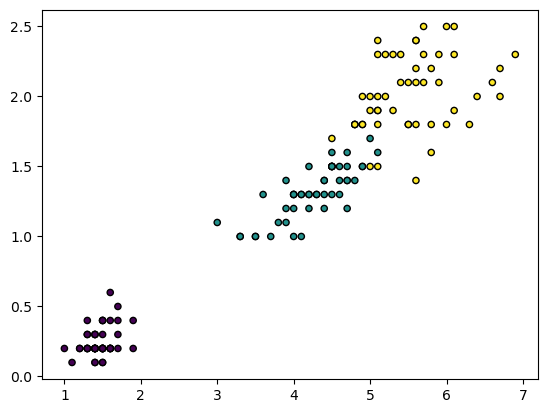

[1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]
Accuracy: 96.67%


In [34]:
# Get Data points and labels 
# X, y = iris.data, iris.target

# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#Plot the data points 
plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap='viridis', edgecolor='k', s=20)
plt.show()

# Initialize KNN 
clf = KNN(k=5)  #clf (classifier) is an instance of a k-Nearest Neighbors (KNN) class we made above

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on test set
predictions = clf.predict(X_test)

# Print predictions and accuracy
print(predictions)
acc = np.sum(predictions == y_test) / len(y_test)
print(f'Accuracy: {acc * 100:.2f}%')